In [22]:
library(tidyverse)
library(hash) #to be able to create a dictionary
library(plotly)
library(magick)

Warning message:
"il pacchetto 'magick' è stato creato con R versione 4.1.3"
Linking to ImageMagick 6.9.12.3
Enabled features: cairo, freetype, fftw, ghostscript, heic, lcms, pango, raw, rsvg, webp
Disabled features: fontconfig, x11



## Exercise 1 - vector and dataframes

In [2]:
Loch <- c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay", "Loch Awe", "Loch Maree", "Loch Ericht", "Loch Lochy", "Loch Rannoch", "Loch Shiel", "Loch Katrine", "Loch Arkaig", "Loch Shin")
volume <- c(7.45, 2.6, 2.3, 1.6, 1.2, 1.09, 1.08, 1.07, 0.97, 0.79, 0.77, 0.75, 0.35)
Area <- c(56, 71, 27, 26.4, 39, 28.6, 18.6, 16,19, 19.5, 12.4, 16, 22.5)
Length <- c( 39,36, 18.8, 23, 41, 20, 23, 16, 15.7, 28, 12.9, 19.3, 27.8)
Max_depth <- c(230, 190, 310, 150, 94, 114, 156, 162, 134, 128, 151, 109, 49)
Mean_depth <- c(132, 37, 87,60.6, 32, 38, 57.6, 70, 51, 40, 43.4, 46.5, 15.5)
scottish.lakes <- data.frame(Loch,volume,Area,Length, Max_depth,Mean_depth )
scottish.lakes

#Request one: find the max volume and area of a scottish lake
cat("The max volume of a lake is: ",max(scottish.lakes[,2])) 
cat("\nThe max area of a lake is: ",max(scottish.lakes[,3]))

#Request two: order the frame with respect to the area and determine the two largest area lakes
scot_ord<-scottish.lakes[order(scottish.lakes$Area, decreasing=TRUE),]
cat("\nThe two largest lakes are: ")
head(scot_ord, n=2)

#Request three: by summing up the areas occupied by the lakes, determine the area of Scotland covered by water
result<-sum(scottish.lakes[,3])
cat("\nThe area of Scotland occupied by the lakes is: ",result)
perc<-(77.933/result)*100
cat("\nSo the percentual of Scotland covered with lakes is: ",perc,'%')

Loch,volume,Area,Length,Max_depth,Mean_depth
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


The max volume of a lake is:  7.45
The max area of a lake is:  71
The two largest lakes are: 

,Loch,volume,Area,Length,Max_depth,Mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71,36,190,37
1,Loch Ness,7.45,56,39,230,132



The area of Scotland occupied by the lakes is:  372
So the percentual of Scotland covered with lakes is:  20.94973 %

## Exercise 2 - Crude Oil Production

[1] "data.frame"

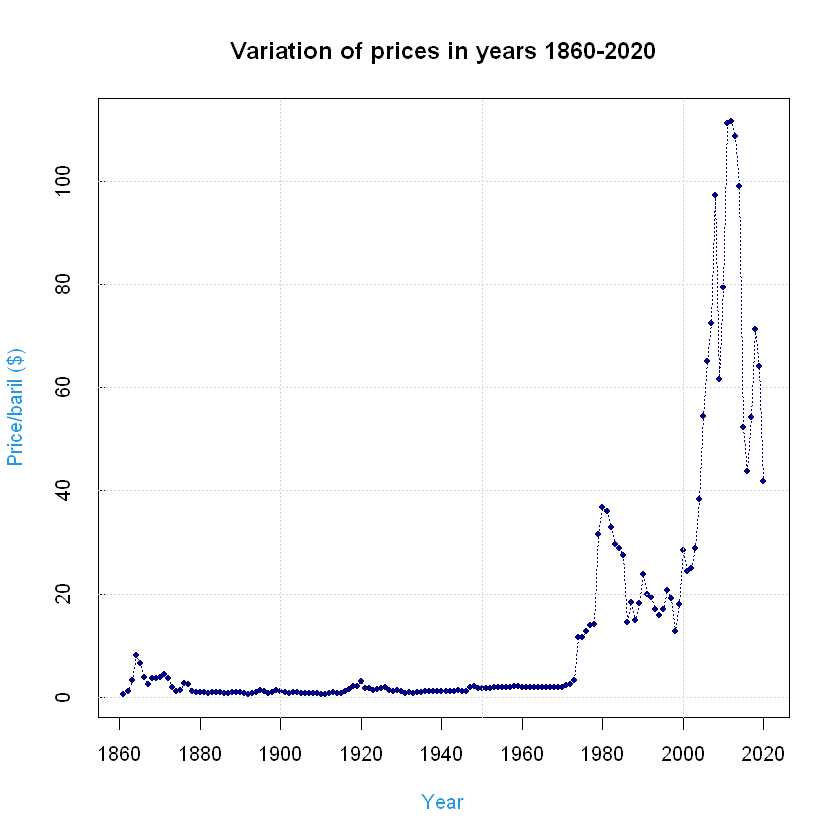

The highest price in history is:  111.6697 $
It occurred in:  2012

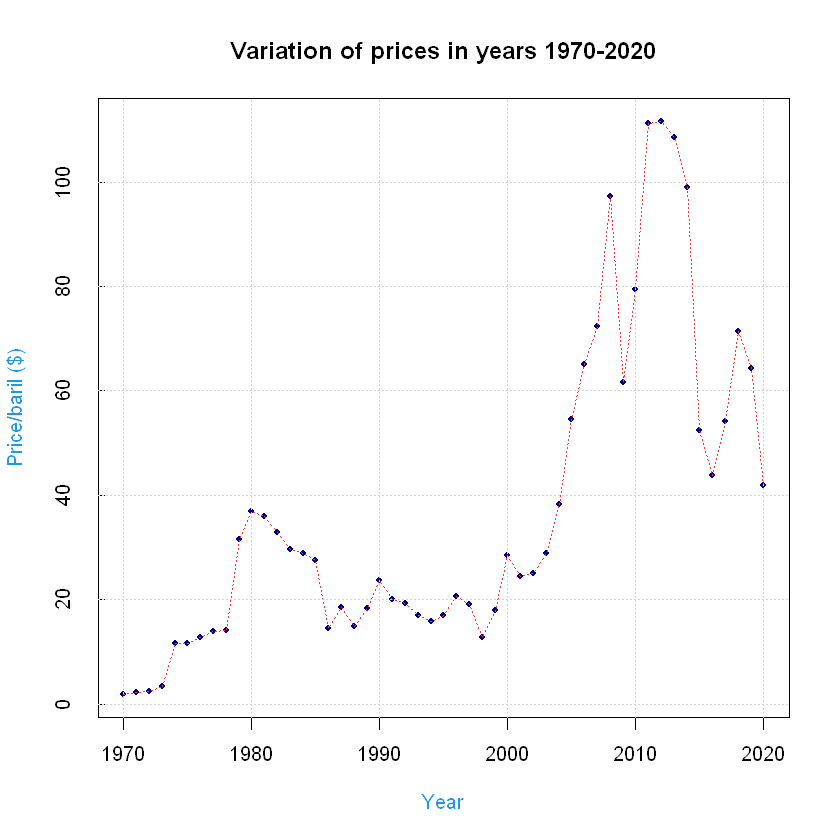

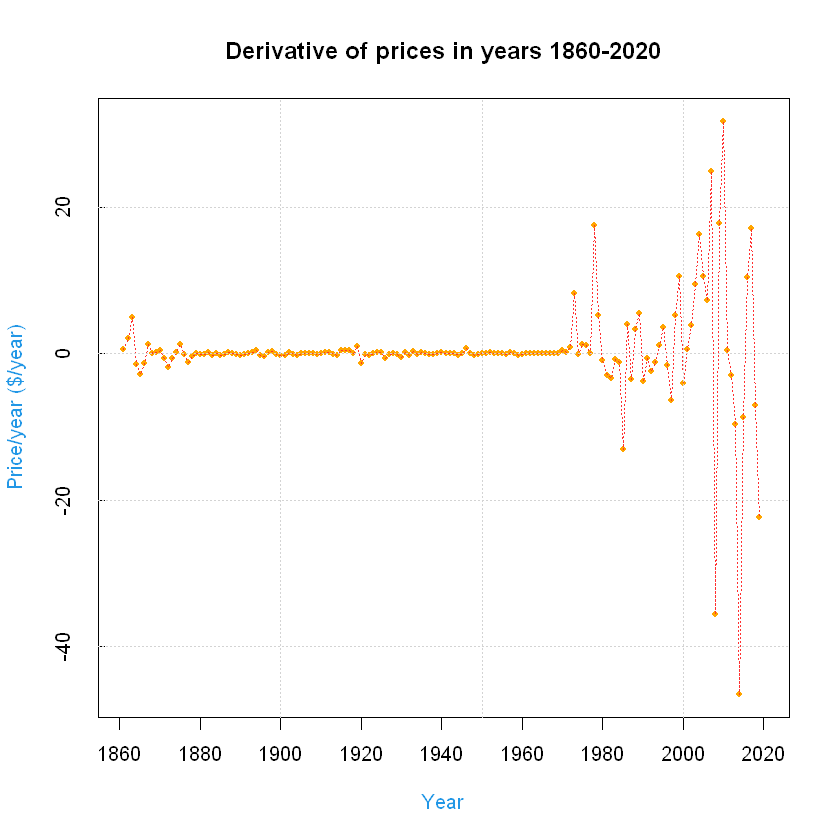

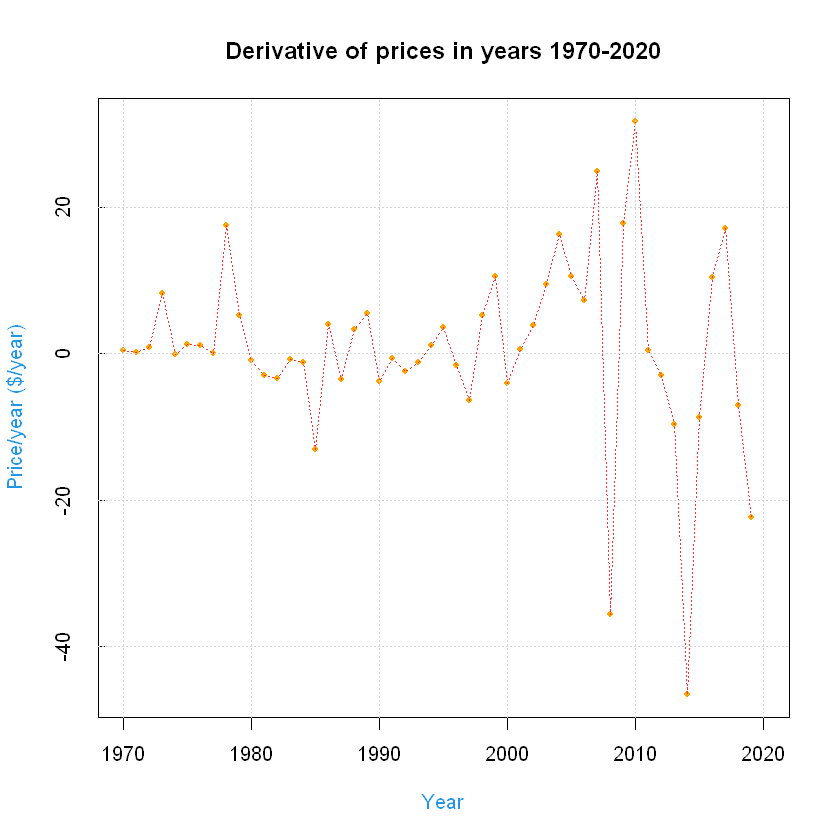

In [3]:
#1) Write R code that is able to read the file and import it in a data frame structure
oil.prices <- read.csv("crude-oil-prices.csv")
oil.prices<-oil.prices[,-1]
oil.prices<-oil.prices[,-1]
names(oil.prices)[2]<-'Prices'
class(oil.prices)

#2) 2 produce a plot with the Oil price as a function of the year
plot(oil.prices$Year,oil.prices$Prices, pch = 20,col = " navy ", cex =1,main='Variation of prices in years 1860-2020', xlab='Year',ylab='Price/baril ($)',col.lab = 4,xaxt = "n",tck = 0.01)
lines (oil.prices$Year,oil.prices$Prices, col = "navy", lty =3)
axis(1, at = seq(1860,2020,20))
grid()

modern_times<-which(oil.prices==1970,arr.ind=TRUE)
plot(oil.prices$Year[modern_times[1]:160],oil.prices$Prices[modern_times[1]:160],main='Variation of prices in years 1970-2020', pch = 20,col = " navy ", cex =1, xlab='Year',ylab='Price/baril ($)',col.lab = 4,xaxt = "n",tck = 0.01)
lines (oil.prices$Year[modern_times[1]:160],oil.prices$Prices[modern_times[1]:160], col = "firebrick 1", lty =3)
axis(1, at = seq(1970,2020,10))
grid(NULL, col = "lightgray", lty = "dotted",
     lwd = par("lwd"), equilogs = TRUE)

#3) which is the highest price in history ? When did it occur ?
max.price=max(oil.prices[,2])
cat("The highest price in history is: ",max.price,"$") 
max.coord<-which(oil.prices==max.price,arr.ind=TRUE)
cat("\nIt occurred in: ",oil.prices[max.coord[1],1]) 

#4) plot the derivative of the curve, simply evaluated with the finite difference formula
prices<-oil.prices$Prices
der=numeric(160)
for (i in 1:160){
    der[i]=prices[i+1]-prices[i]
    }

plot(oil.prices$Year,der, pch = 20,col = "orange ", cex =1,main='Derivative of prices in years 1860-2020', xlab='Year',ylab='Price/year ($/year)',col.lab = 4,xaxt = "n",tck = 0.01)
lines (oil.prices$Year,der, col = "firebrick 1", lty =3)
axis(1, at = seq(1860,2020,20))
grid()

plot(oil.prices$Year[modern_times[1]:160],der[modern_times[1]:160], pch = 20,col = "orange ", cex =1,main='Derivative of prices in years 1970-2020', xlab='Year',ylab='Price/year ($/year)',col.lab = 4,xaxt = "n",tck = 0.01)
lines (oil.prices$Year[modern_times[1]:160],der[modern_times[1]:160], col = "firebrick 1", lty =3)
axis(1, at = seq(1970,2020,10))
grid()

## Exercise 3 - World Coal Production

[1] "tbl_df"     "tbl"        "data.frame"

The number of countries in the file are:  175

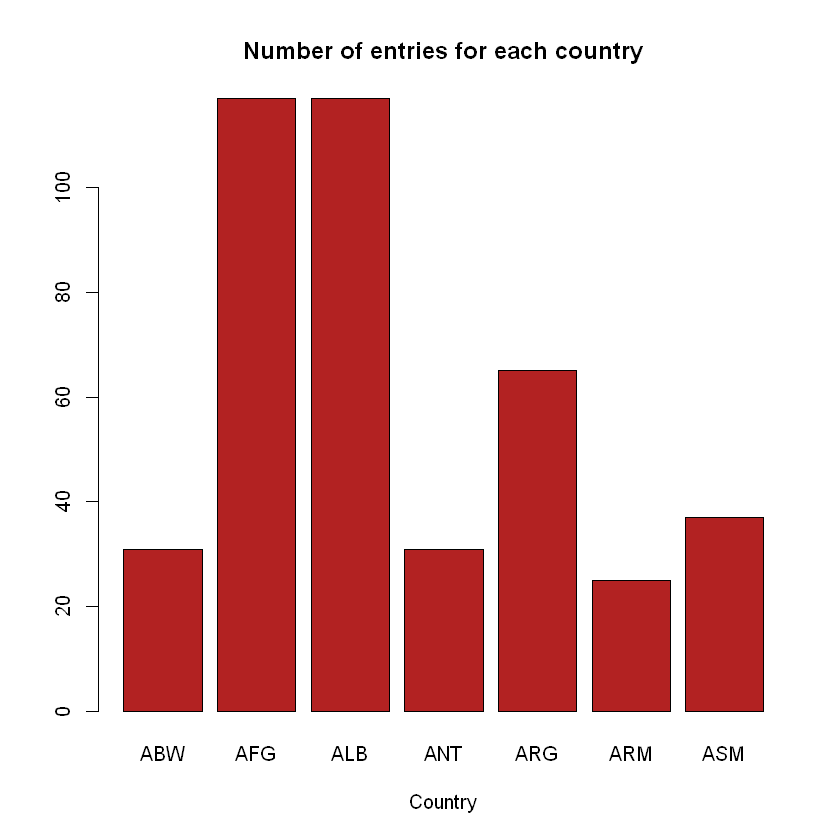

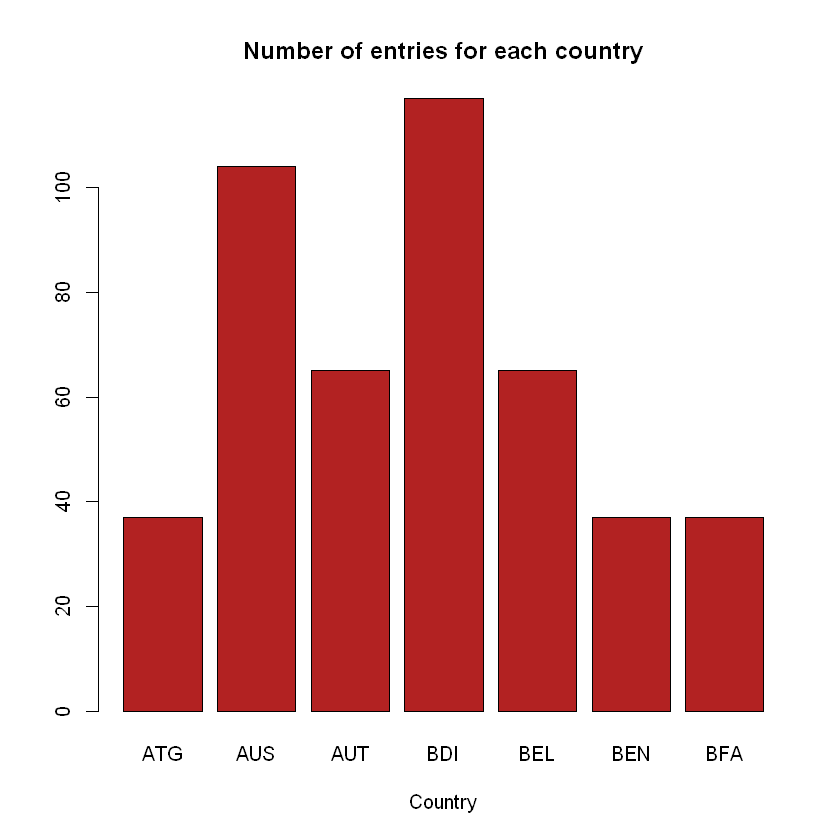

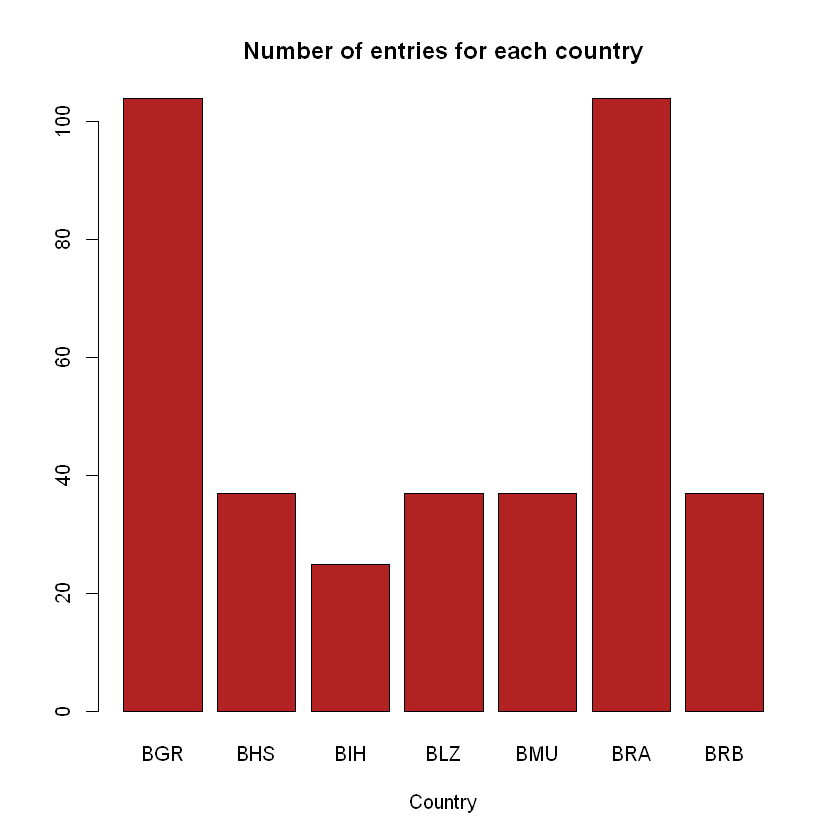

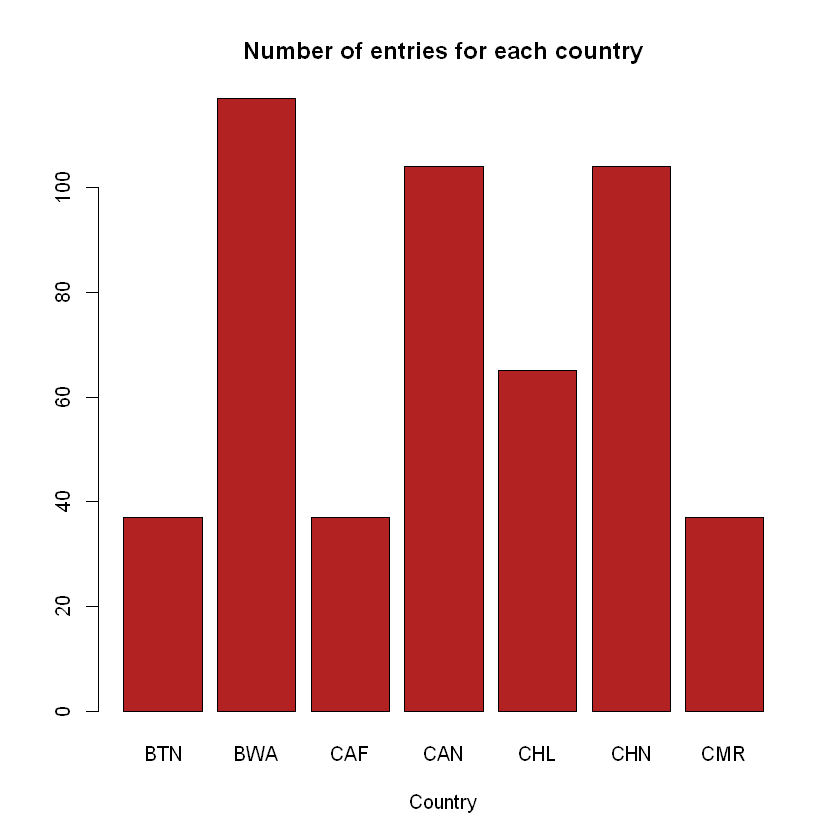

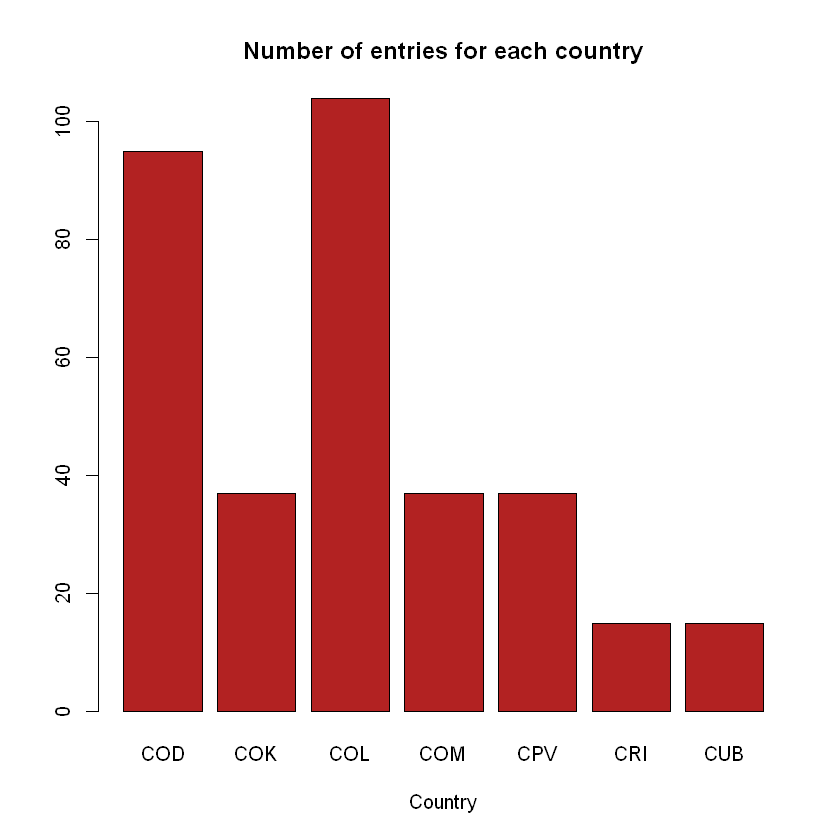

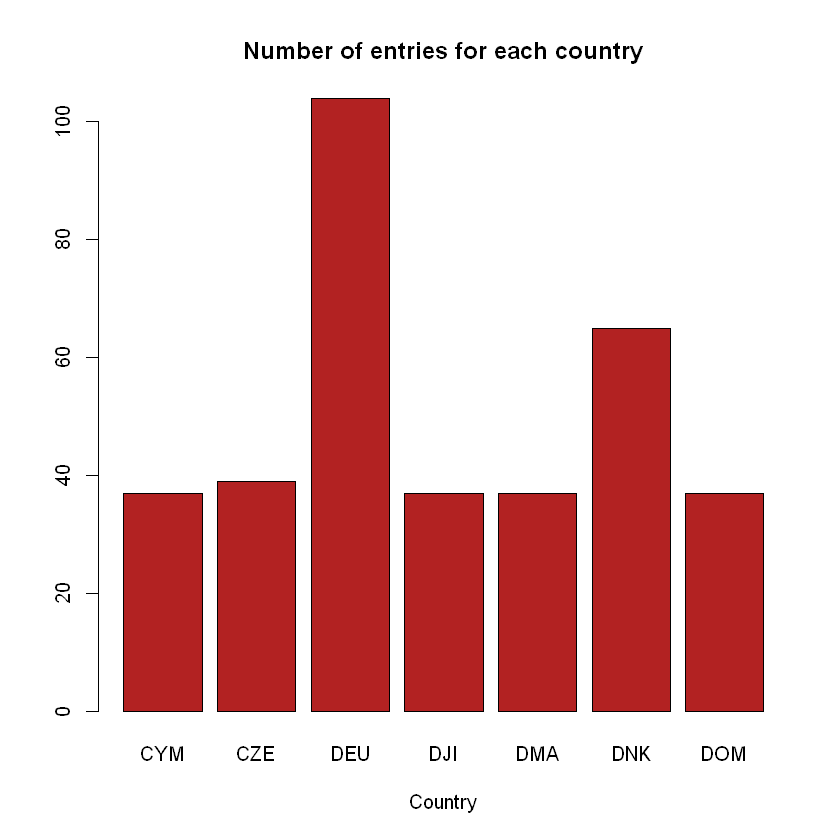

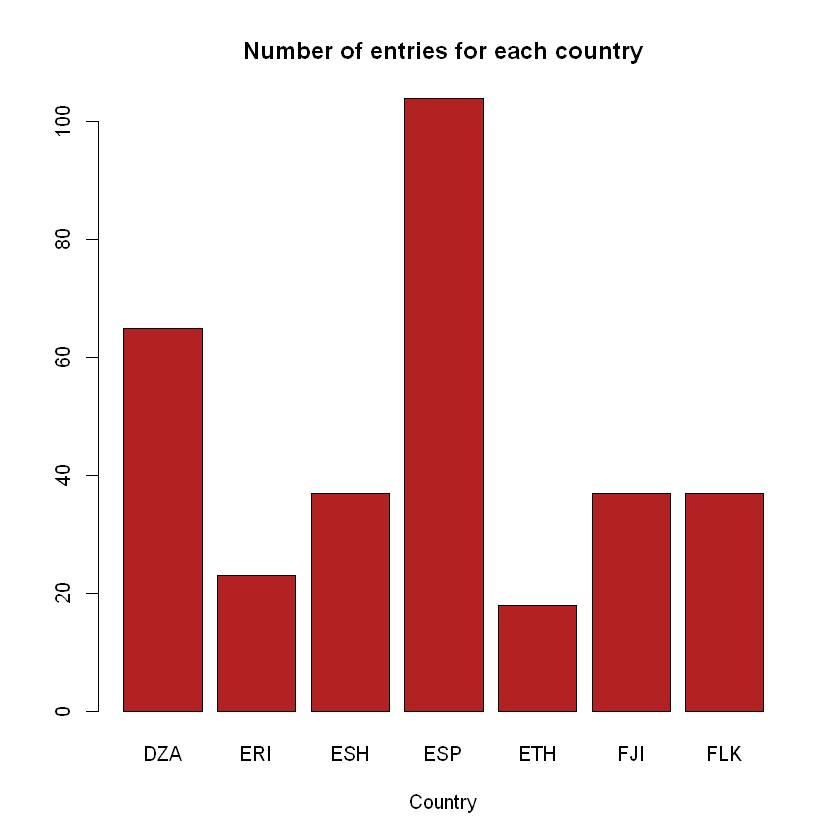

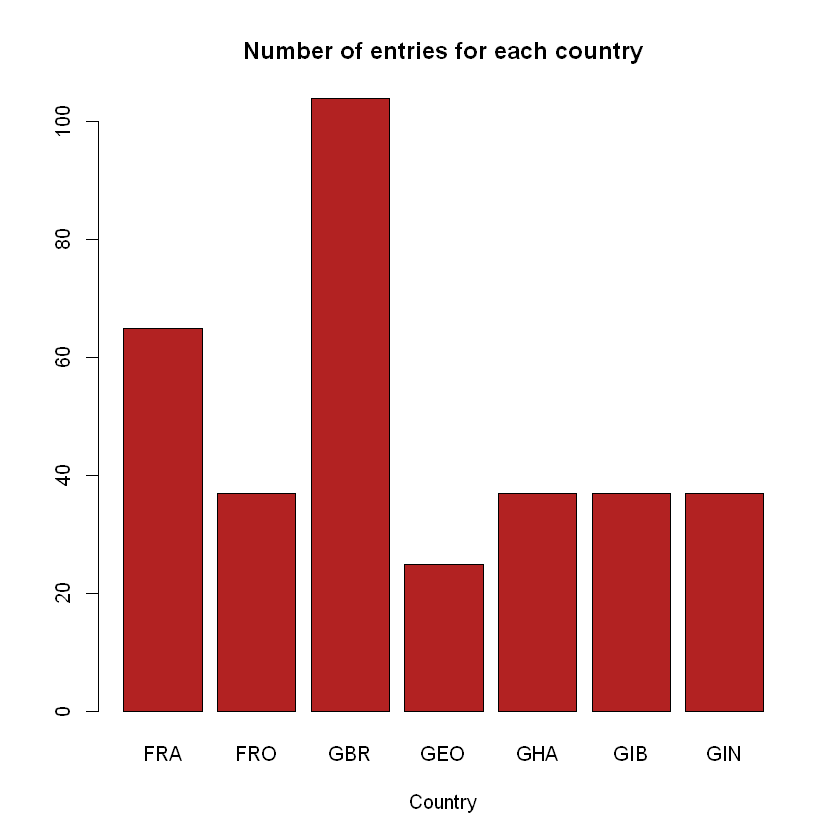

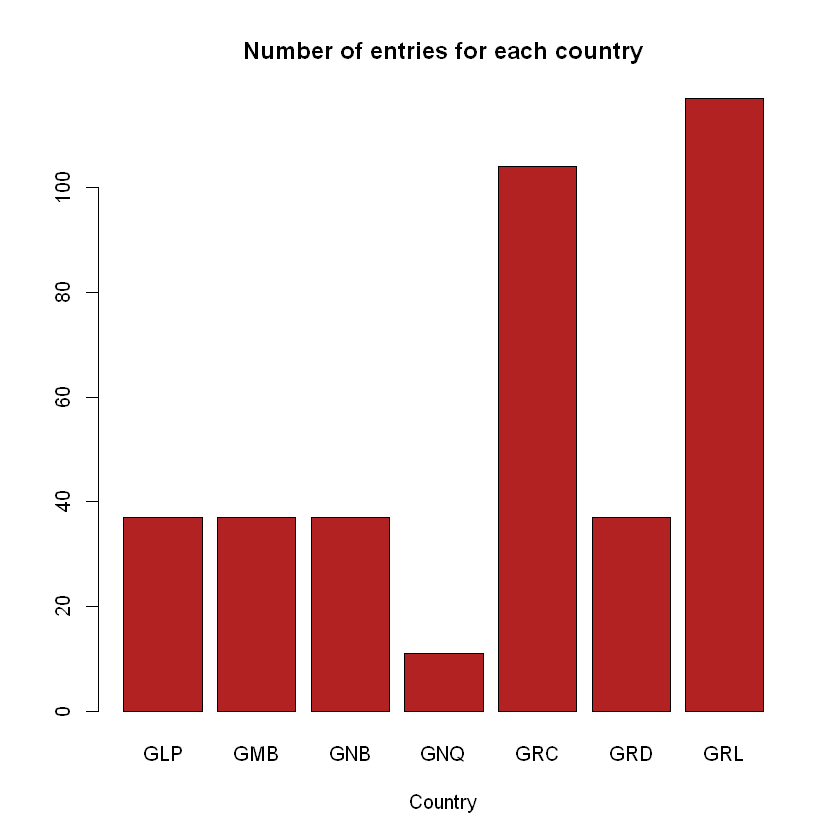

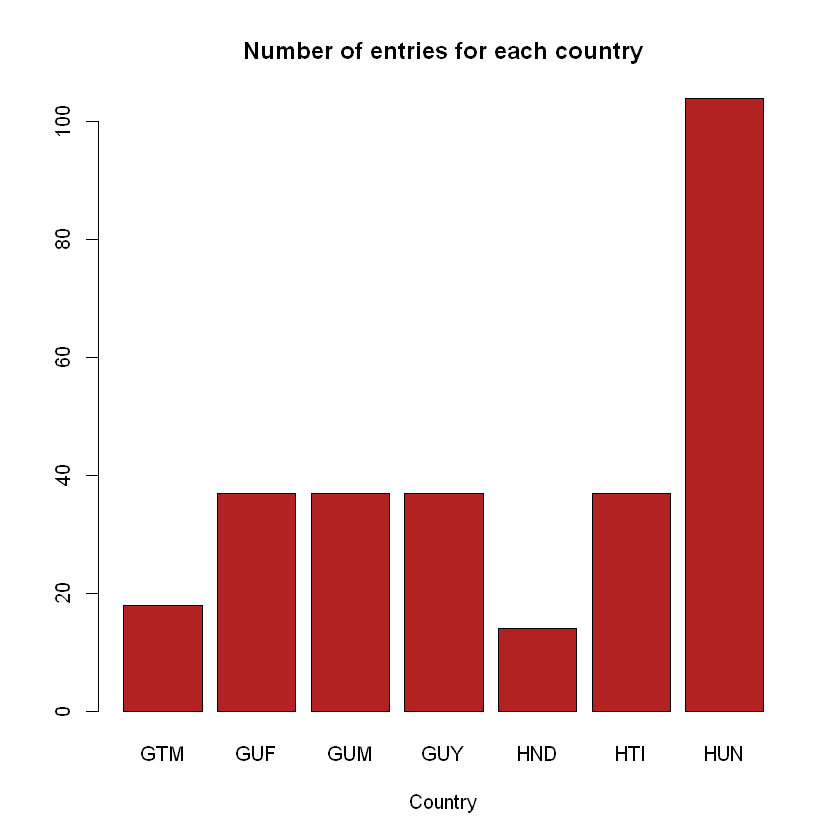

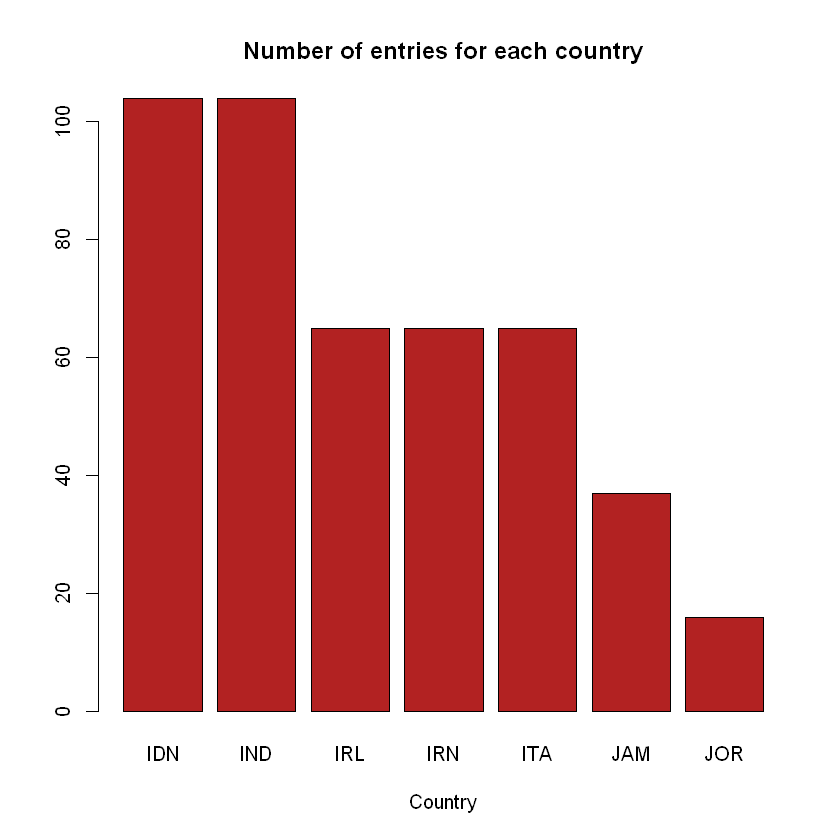

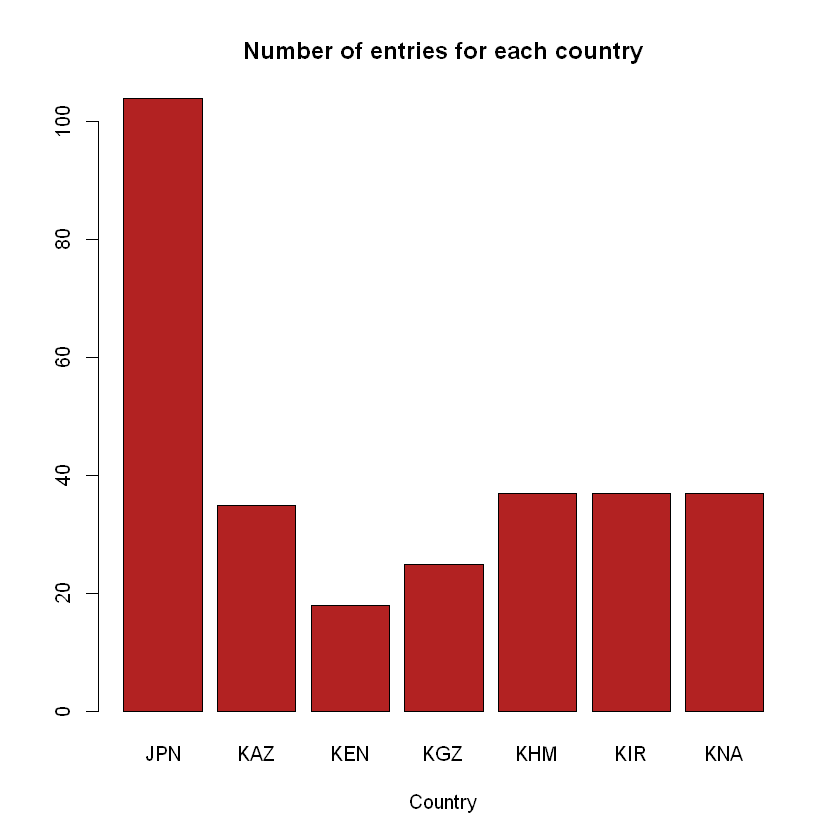

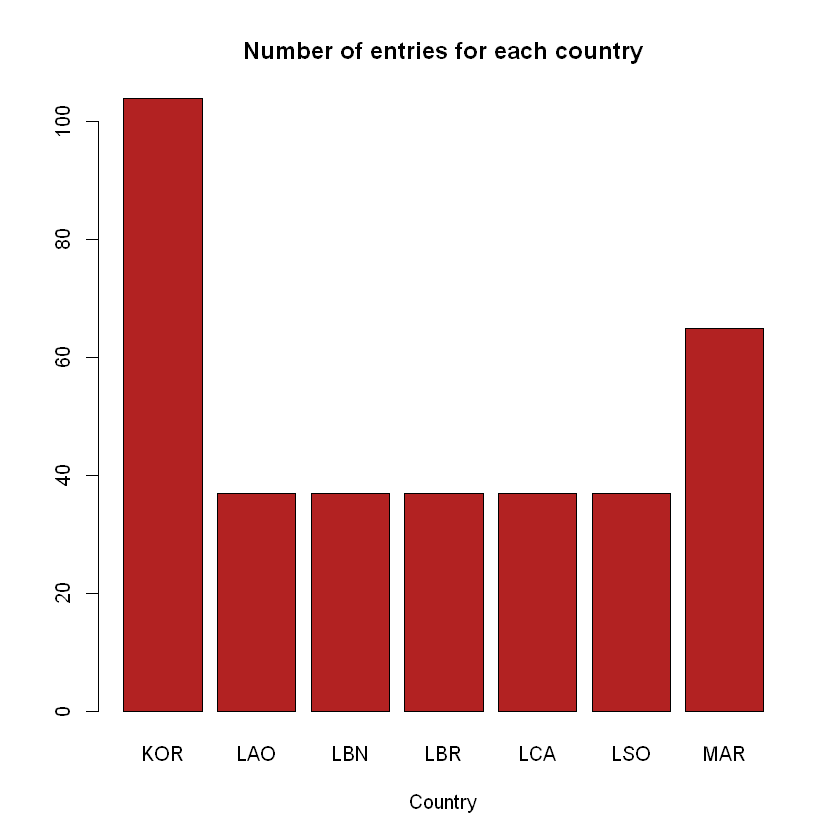

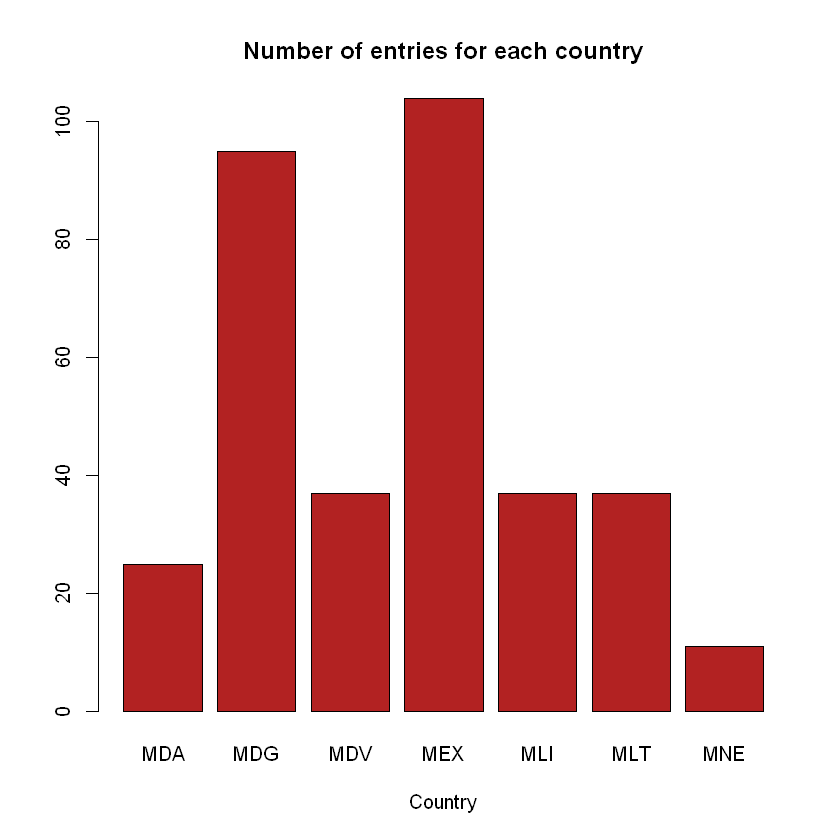

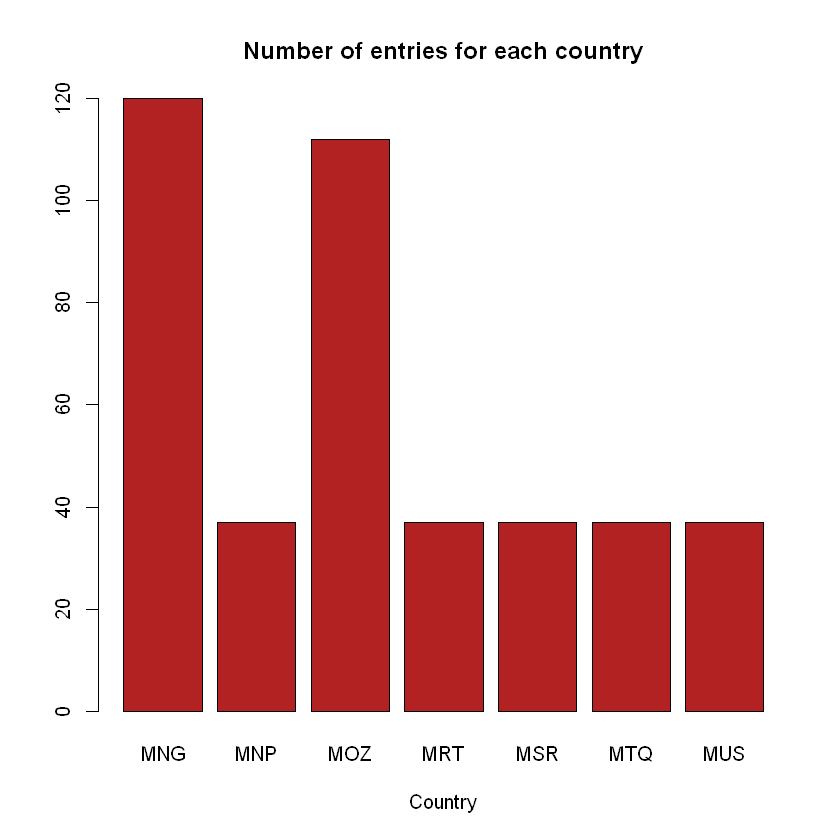

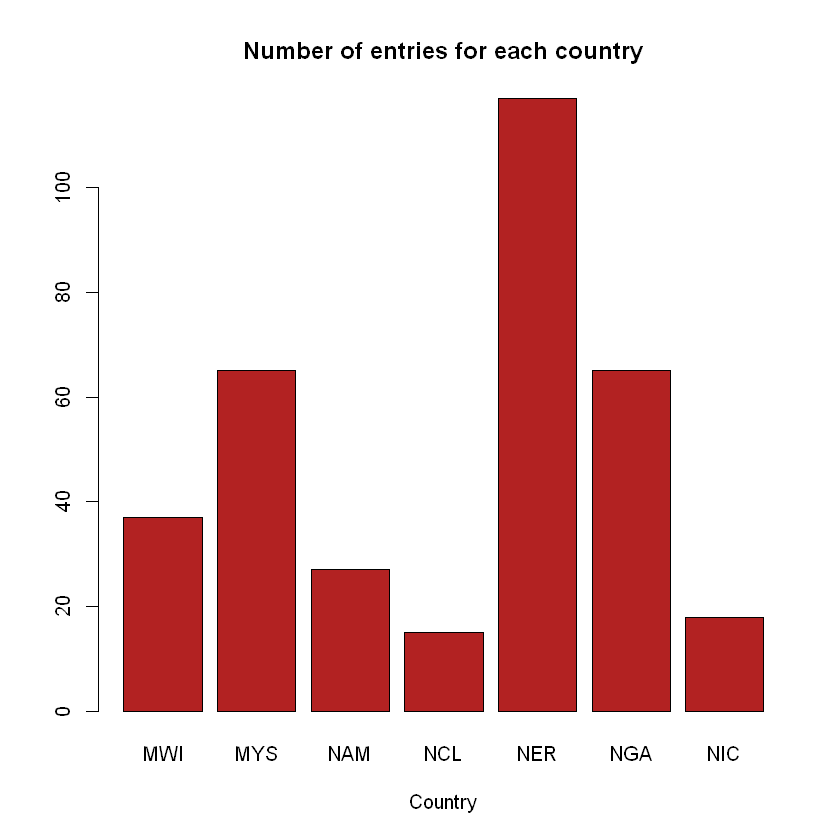

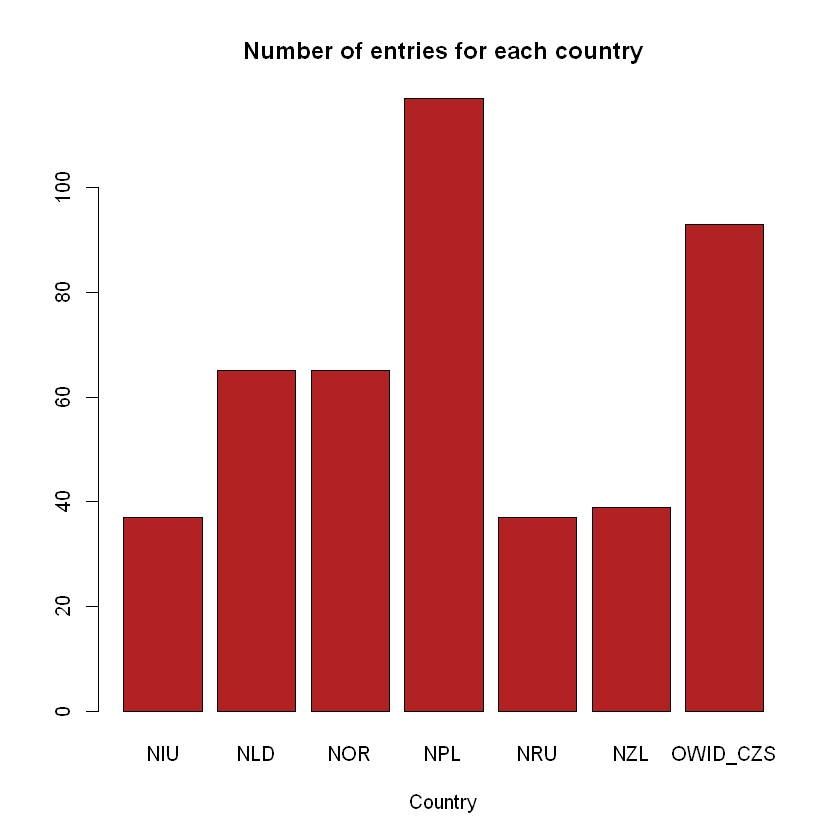

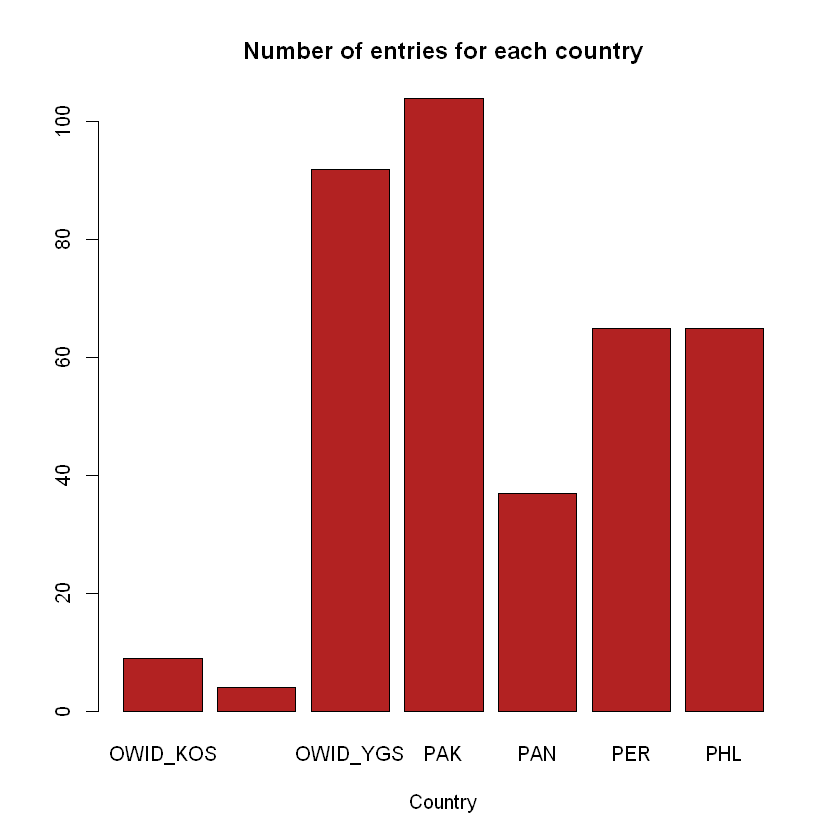

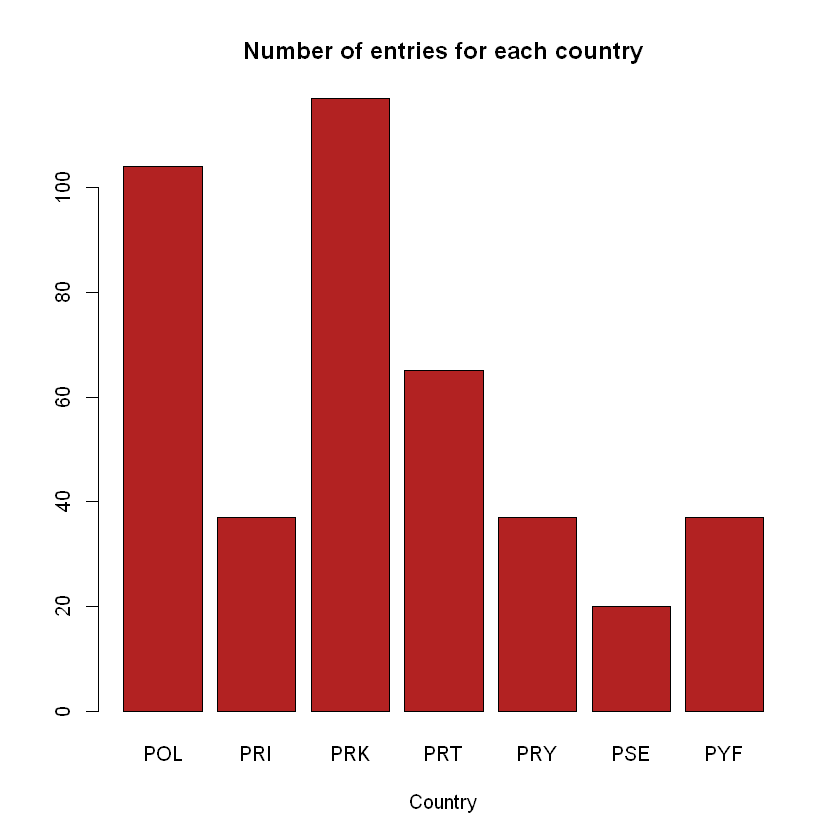

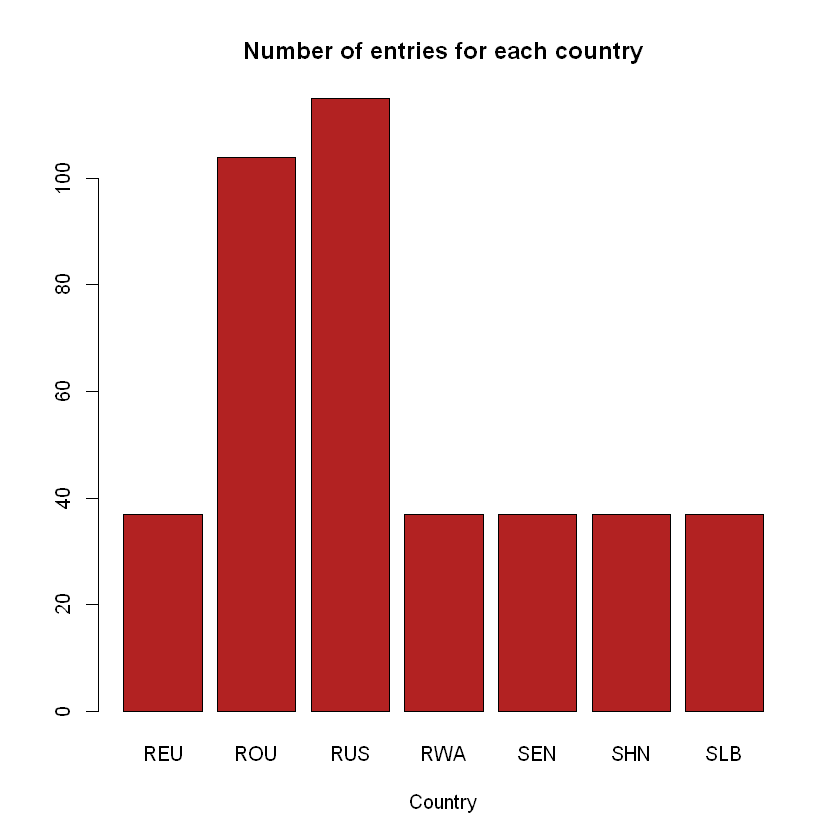

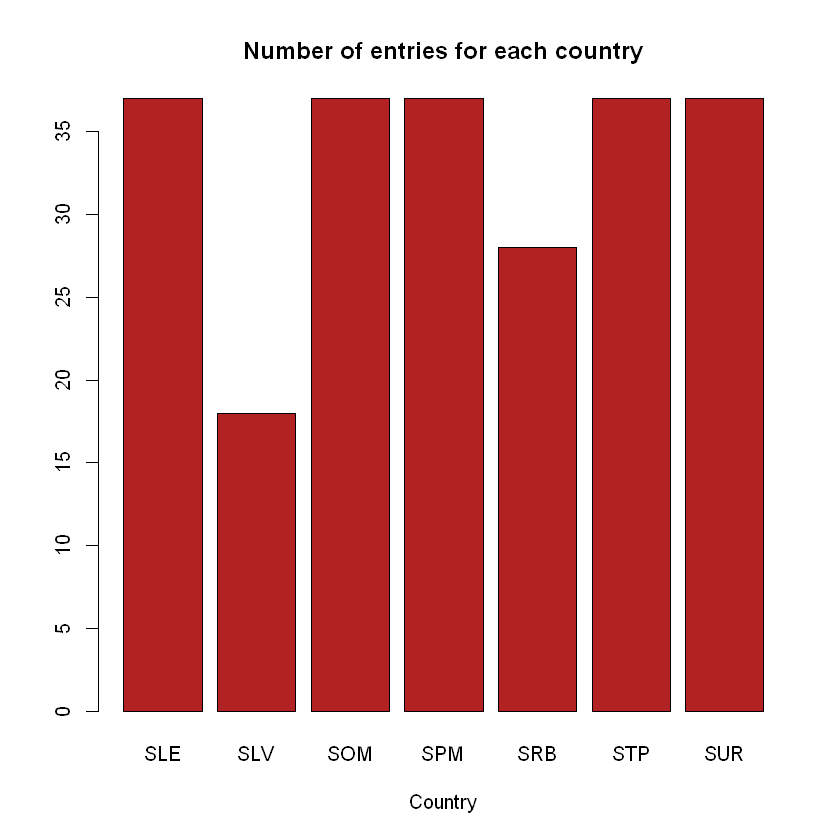

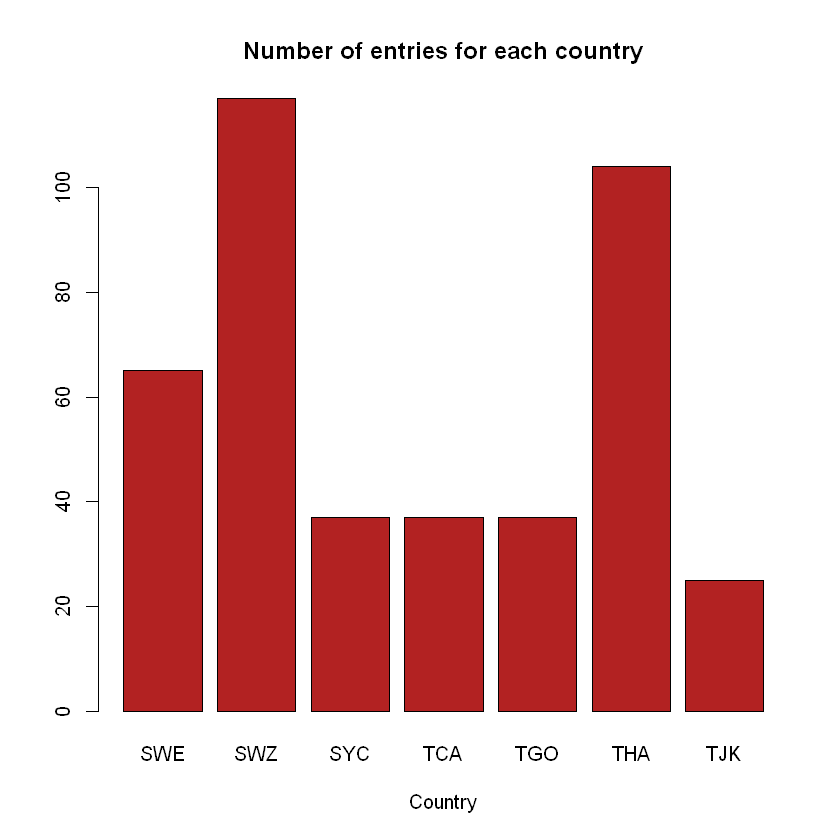

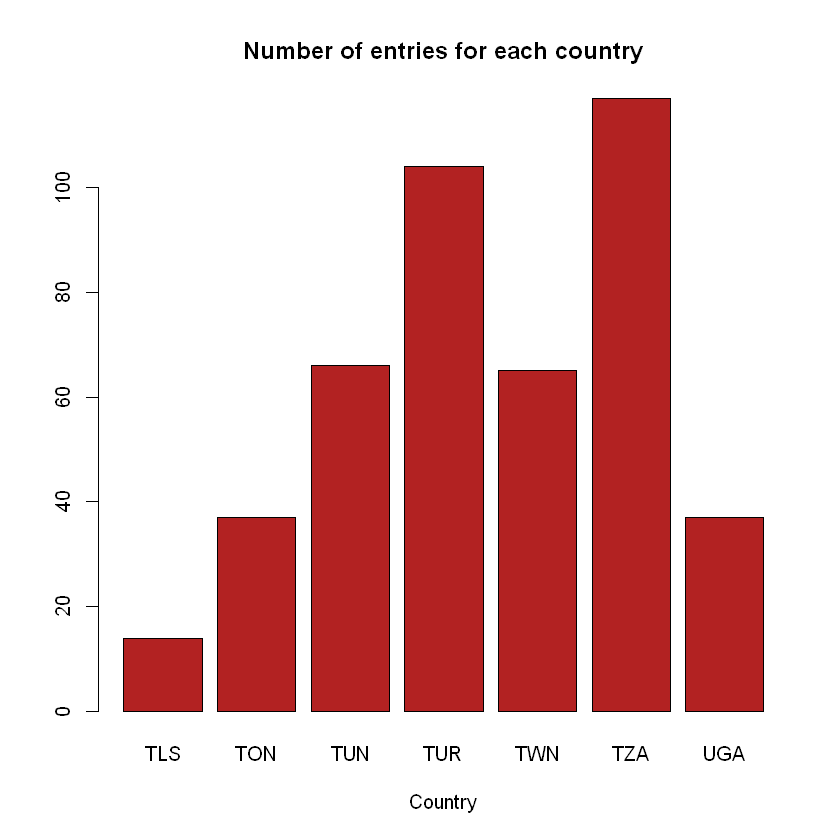

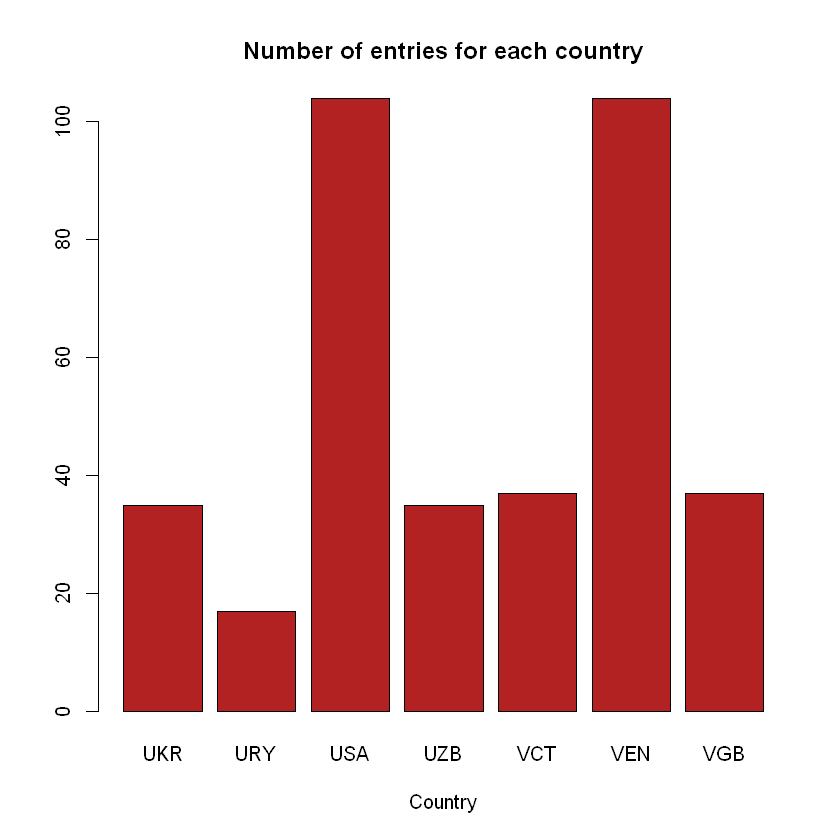

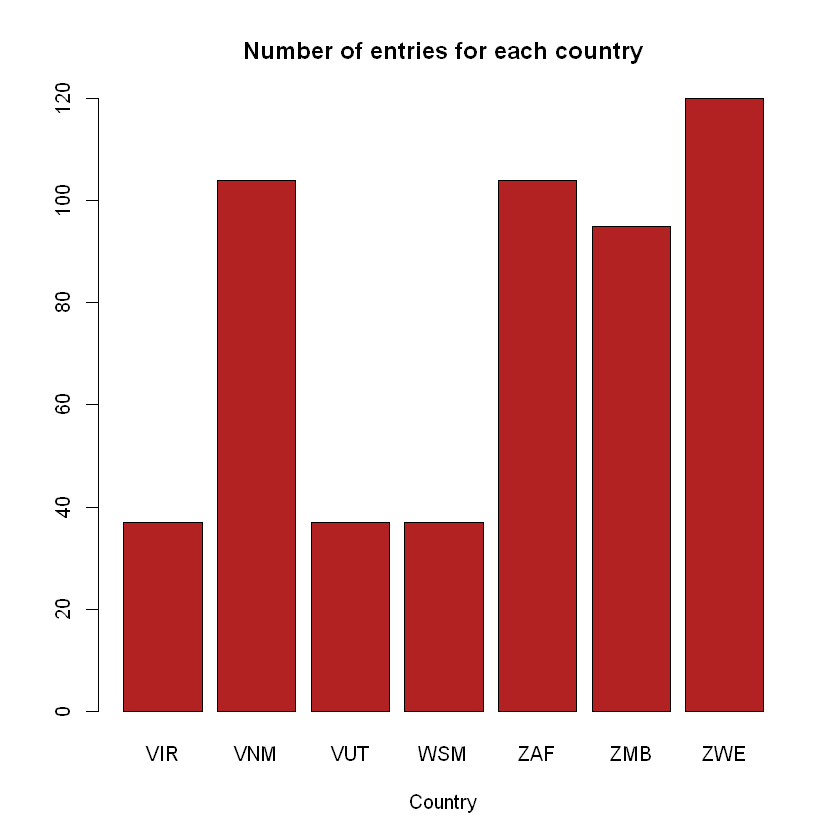

In [23]:
#1) Write R code that is able to read the file and import it in a tibble [4] structure
old.coal.production <- as_tibble(read.csv("coal-production-by-country.csv"))
names(old.coal.production)[4]<-'Coal_prod'
class(old.coal.production)

#2) Count the number of countries available in the file and produce a barplot with the number of entries for each country
coord<-which(old.coal.production=="",arr.ind=TRUE)
coal.production<-old.coal.production[-coord[,1],]
coord1<-which(coal.production=="OWID_WRL",arr.ind=TRUE)
coal.production<-coal.production[-coord1[,1],]
counts<-table(coal.production$Code)
cat('The number of countries in the file are: ',dim(counts))
#I plot 25 different barplot because with just one barplot the result are not clear
for (i in 1:25){
    barplot(counts[(((i-1)*7)+1):(i*7)], main="Number of entries for each country", xlab="Country", col="firebrick")
}

In [24]:
#3) selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions
new.coal.production<-coal.production[coal.production$Year>=1970,]
new.coal.production<-new.coal.production[order(new.coal.production$Code),]
new.counts<-table(new.coal.production$Code)
num_i=1 #Initial number that I will use to slice the dataframe, in order to create one dataframe for each country
collect<-hash() #dictionary
for (i in 1:dim(new.counts)){
    num_f=new.counts[i]+num_i-1 #Final number for the dataframe slicing
    country.coal.prod<-new.coal.production[num_i:num_f,] #creation of one dataframe for each country
    sum<-sum(country.coal.prod$Coal_prod)
    collect[[country.coal.prod$Code[1]]]<-sum
    num_i=num_f+1
}
cat('The top 5 countries for coal production (TW · hour) after 1970 are:\n')
values(collect, keys=NULL)[order(values(collect, keys=NULL), decreasing=TRUE)][1:5]

The top 5 countries for coal production (TW · hour) after 1970 are:


CHN       USA       RUS       AUS       IND 
459564.65 226068.84 101908.49  83077.07  77043.45

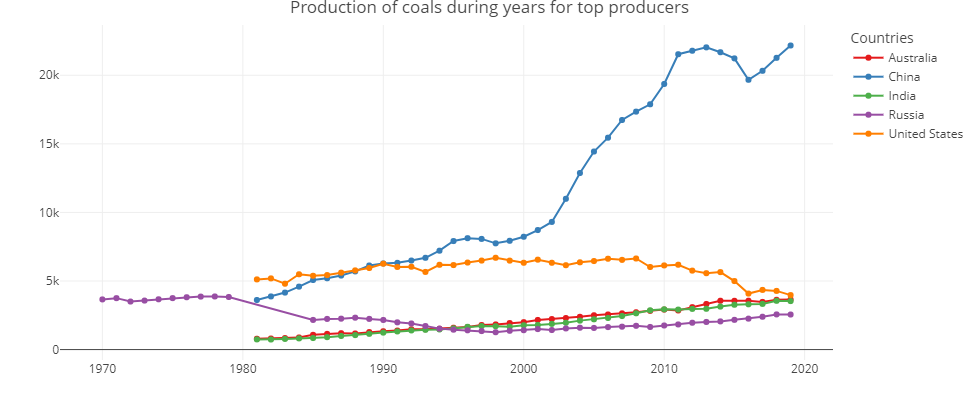

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      979    400 sRGB       TRUE     56575 72x72  

In [28]:
top <- rbind(new.coal.production[new.coal.production$Code=="CHN",],new.coal.production[new.coal.production$Code=="USA",],new.coal.production[new.coal.production$Code=="RUS",],new.coal.production[new.coal.production$Code=="AUS",],new.coal.production[new.coal.production$Code=="IND",])
top_fig<-plot_ly(data = top, x = top$Year, y = top$Coal_prod,type="scatter", color = top$Entity, colors = "Set1", mode = 'lines+markers') %>% layout(title="Production of coals during years for top producers", legend=list(title=list(text="Countries"))) 
image_read('top.png')

It can be observed that China, since the start of its activity, has always been a top producer of coal but in the last 20 years it has significantly increased its activity.

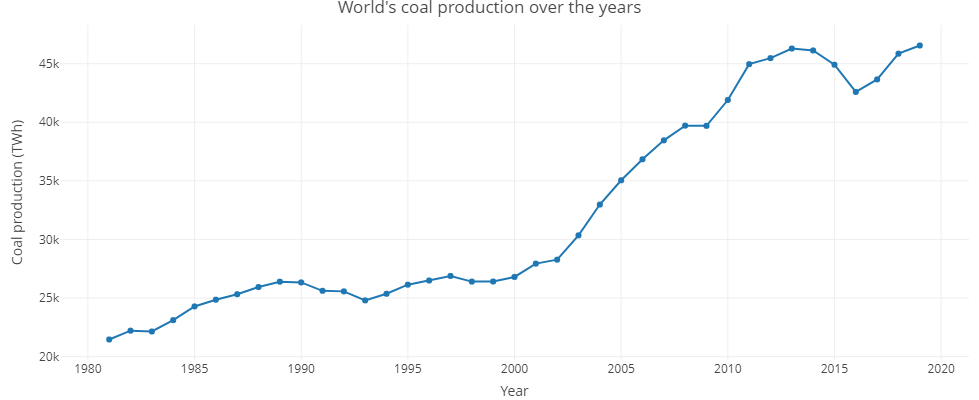

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      979    400 sRGB       TRUE     45066 72x72  

In [29]:
#5) generate a plot with the cumulative sum of the World’s coal production over the year
world.c.p<-old.coal.production[old.coal.production$Code=="OWID_WRL",]

world<-plot_ly(data = world.c.p, x = world.c.p$Year, y = world.c.p$Coal_prod,type="scatter", colors = "Set1", mode = 'lines+markers') %>% layout(title="World's coal production over the years", xaxis=list(title="Year"), yaxis=list(title="Coal production (TWh)")) 
image_read('world_coal.png')